In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Cleaning

In [2]:
data = pd.read_csv('spotify_unique_ver4.csv')

(14860, 18)


,song_name,artist_name,release_date,popularity,genres,artist_popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,我們的基因,Kay Tse,2019-11-06,51,c-pop,57,0.701,0.635,279547.0,0.445,0.000000,1,0.1810,-8.185,0,0.0333,131.399,0.436
1,忘記和記,Juno Mak,2019-10-22,50,c-pop,55,0.650,0.678,157156.0,0.498,0.000000,6,0.0602,-13.582,0,0.0407,140.053,0.406
2,Two at a time,AGA,2019-10-30,53,c-pop,54,0.686,0.763,261639.0,0.561,0.000003,8,0.1110,-6.806,1,0.0290,89.251,0.372
3,"讓愛高飛 - 劇集 ""多功能老婆"" 片尾曲",Pakho Chau,2019-10-14,51,c-pop,55,0.710,0.485,220286.0,0.377,0.000000,10,0.1190,-9.091,1,0.0300,139.976,0.355
4,爸爸的禮物,Jason Chan,2019-11-15,38,c-pop,54,0.695,0.582,272909.0,0.413,0.000000,2,0.2430,-8.034,0,0.0240,82.984,0.214


### relase_date 改成只顯示年份

In [3]:
tem = []
for i in range(data.shape[0]):
    tem.append(data['release_date'][i].split('-')[0])
data['release_date'] = tem
data.head()

,song_name,artist_name,release_date,popularity,genres,artist_popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,我們的基因,Kay Tse,2019,51,c-pop,57,0.701,0.635,279547.0,0.445,0.000000,1,0.1810,-8.185,0,0.0333,131.399,0.436
1,忘記和記,Juno Mak,2019,50,c-pop,55,0.650,0.678,157156.0,0.498,0.000000,6,0.0602,-13.582,0,0.0407,140.053,0.406
2,Two at a time,AGA,2019,53,c-pop,54,0.686,0.763,261639.0,0.561,0.000003,8,0.1110,-6.806,1,0.0290,89.251,0.372
3,"讓愛高飛 - 劇集 ""多功能老婆"" 片尾曲",Pakho Chau,2019,51,c-pop,55,0.710,0.485,220286.0,0.377,0.000000,10,0.1190,-9.091,1,0.0300,139.976,0.355
4,爸爸的禮物,Jason Chan,2019,38,c-pop,54,0.695,0.582,272909.0,0.413,0.000000,2,0.2430,-8.034,0,0.0240,82.984,0.214


### 移除2020年的資料(1筆)

In [4]:
data = data[data['release_date']!='2020']

### 分年度

In [5]:
def get_year_data(data , number):
    return data[data['release_date']== str(number) ]

In [6]:
data_gb = data.groupby('release_date')

In [7]:
year_Song_count = data_gb['release_date'].describe()['count']

In [8]:
Year_Song_4Pre = np.percentile(year_Song_count, (25, 50, 75), interpolation='midpoint')
Year_Song_4Pre

array([9.0, 22.0, 97.5], dtype=object)

In [9]:
# year_Song_cou
length_year = len(year_Song_count[ year_Song_count > Year_Song_4Pre[2] ])
length_year

18

In [10]:
year_Song_count[ year_Song_count > Year_Song_4Pre[2] ]

d2019 =  get_year_data(data, 2019)

In [11]:
year = [str(i) for i in range(2019 , 2019-length_year, -1)]

In [12]:
datas = {y :get_year_data(data, y) for y in year }

In [13]:
length_year

18

In [19]:

def as_feature_pop(data,popularity = 70):
    return data[data['popularity'] > popularity].loc[:,['danceability','acousticness', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence','key','loudness','tempo','mode', 'artist_popularity']] 
def as_feature_unpop(data,popularity = 30):
    return data[data['popularity'] < popularity].loc[:,['danceability','acousticness', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence','key','loudness','tempo','mode', 'artist_popularity']]  


In [20]:
data_features_p = {i : as_feature_pop( datas[i] ,datas[i]['popularity'].describe()['75%']) for i in datas}
data_features_up = {i : as_feature_unpop( datas[i] ,datas[i]['popularity'].describe()['25%']) for i in datas}

In [22]:
# 只是做標準化而已
from sklearn import preprocessing
def scale_mean(feature):
    return preprocessing.MinMaxScaler().fit_transform(feature).mean(axis=0)

In [23]:
def collect_data(data_features_p , data_features_up , year):
    labels= list(data_features_p[year])[:]
    stats = scale_mean(data_features_p[year]).tolist()
    stats2 = scale_mean(data_features_up[year]).tolist()
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

    # close the plot
    stats=np.concatenate((stats,[stats[0]]))
    stats2 =np.concatenate((stats2,[stats2[0]])) 
    angles=np.concatenate((angles,[angles[0]]))
    
    return stats, stats2, angles, labels


def Myplot( stats, stats2, angles, labels, ax , year):
    ax.set_rlabel_position(250)
    plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
    plt.ylim(0,1)
    ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 10)

    ax.plot(angles, stats, 'o-', linewidth=2, label = "popular")
    ax.fill(angles, stats, alpha=0.25)
    

    ax.plot(angles, stats2, 'o-', linewidth=2, label = "unpopular")
    ax.fill(angles, stats2, alpha=0.25 )
    ax.set_title( str(year)  + ' Mean Values of the audio features')
    ax.grid(True)
    plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

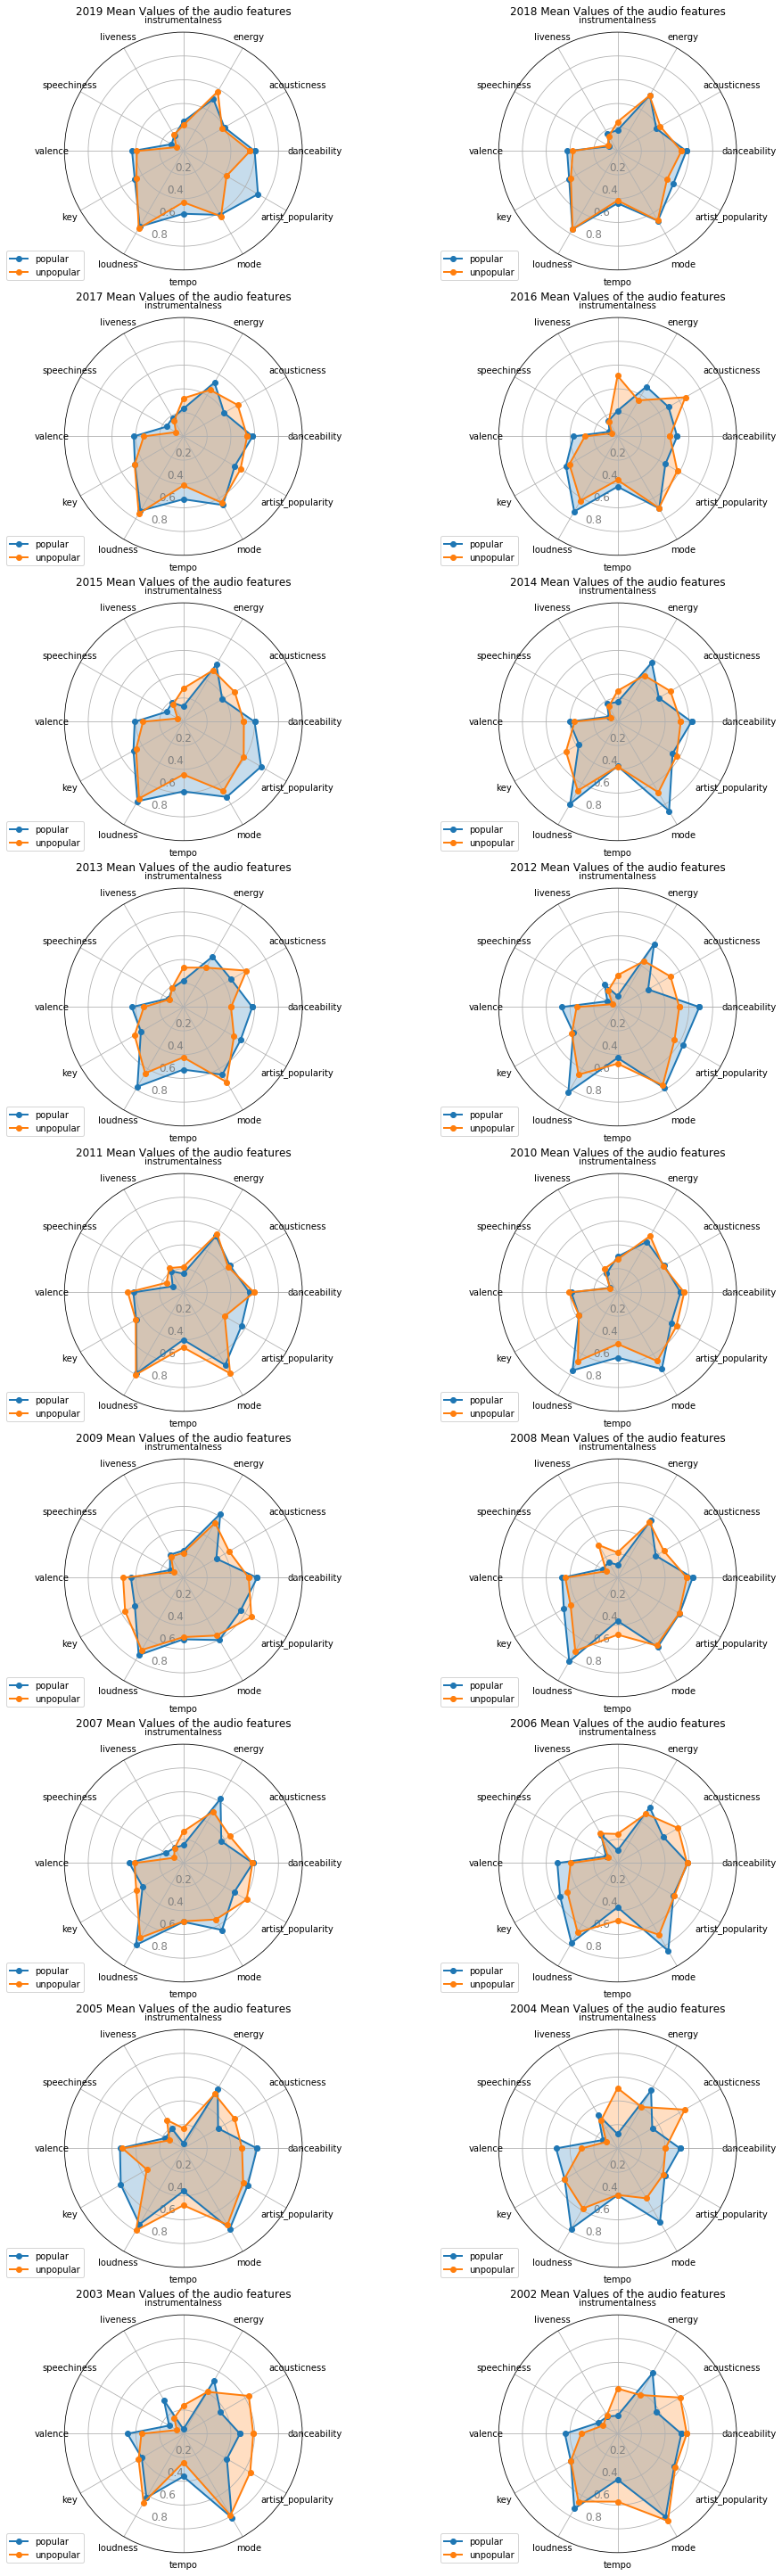

In [36]:
count_posi = 0
fig=plt.figure(figsize = (16,52) )

for y in year:
    count_posi+=1
    ax = fig.add_subplot(9,2,count_posi, polar=True)
    stats, stats2, angles, labels = collect_data(data_features_p , data_features_up , y)
    Myplot(stats , stats2 , angles , labels , ax , y)

In [341]:
def Get_data(data_features_p , start_year=2019 , end_year = 2002):
    
    dic_data = {i: scale_mean(data_features_p[i]).tolist() for i in range(start_year , end_year-1 , -1)}
    dic_labels = {i: list(data_features_p[i])[:]  for i in range(start_year , end_year-1 , -1)}
    dic_angles = {i: np.linspace(0, 2*np.pi, len(dic_labels[i]), endpoint=False) for i in range(start_year , end_year-1 , -1)}
    for i in range(start_year , end_year , -1):

        dic_data[i] = np.concatenate( (dic_data[i],[dic_data[i][0]]))
        dic_angles[i] = np.concatenate( (dic_angles[i] , [dic_angles[i][0]] ))
            
    return dic_data , dic_angles , dic_labels


In [342]:
def My_plot2(dic_data , dic_angles, dic_labels):
    fig=plt.figure(figsize = (15,15))
    ax = fig.add_subplot(221, polar=True)
    ax.set_rlabel_position(250)
    plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="Red", size=12)
    plt.ylim(0,1)
    for i in dic_data:
        ax = fig.add_subplot(221, polar=True)
        ax.plot(dic_angles[i],dic_data[i], '-o' ,linewidth=2, label = str(i))
        ax.fill(dic_angles[i], dic_data[i], alpha=0.25)
        ax.set_thetagrids(dic_angles[i] * 180/np.pi, dic_labels[i] , fontsize = 13)
    ax.set_title('Mean Values of the audio features')
    ax.grid(True)
    plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))


/Users/jiangsiyang/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


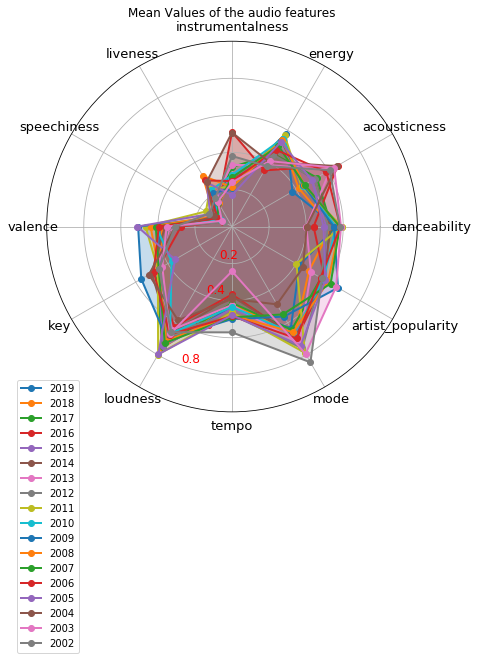

In [346]:
dic_data, angles , labels = Get_data(data_features_up , start_year=2019 , end_year = 2002)
My_plot2(dic_data , angles , labels)

/Users/jiangsiyang/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


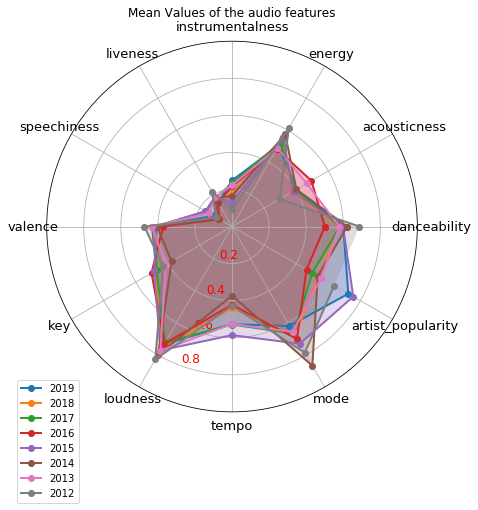

In [420]:
dic_data, angles ,labels = Get_data(data_features_p , start_year=2019 , end_year = 2012)
My_plot2(dic_data , angles , labels)